# Nova Análise
Para manter o histórico, criei uma nova análise das formulação com Python

In [553]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [554]:
# Variáveis Globais
RANDOM_STATE = 42
PDI_CORTE_NANO = 0.35 # até 0.35 de PDI
TAMANHO_CORTE_NANO = 300 # Até 300 nanometros

In [555]:
df = pd.read_csv('FormulacoesNano_2.csv', sep=';')

df.columns = [x.lower() for x in df.columns]
df.drop(columns=['manteiga_1', 'manteiga_2', 'formulacao', 'oleo', 'translucida', 'pontodenuvem'], inplace=True)


df.fillna(0, inplace=True)
df.head()

,perc_lipidio1,perc_lipidio2,perc_tensoativo,pdi,tamanho,lipidio1,pontofusao1,perc_ac_palmitico1,perc_ac_estearico1,perc_ac_oleico1,...,perc_ac_caprico2,perc_ac_laurico2,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2
0,25,25,50,"0,1054","25,24",Manteiga de murumuru,"32,5","7,5","3,5","7,5",...,0,0.0,0.0,4,0,0,0.0,0.0,28.0,72.0
1,50,"16,65","33,35","0,118","72,1",Manteiga de murumuru,"32,5","7,5","3,5","7,5",...,0,0.0,0.0,4,0,0,0.0,0.0,28.0,72.0
2,"16,65",50,"33,35","0,5644","277,1",Manteiga de murumuru,"32,5","7,5","3,5","7,5",...,0,0.0,0.0,4,0,0,0.0,0.0,28.0,72.0
3,"37,5","37,5",25,"0,1845","83,22",Manteiga de murumuru,"32,5","7,5","3,5","7,5",...,0,0.0,0.0,4,0,0,0.0,0.0,28.0,72.0
4,50,25,25,"0,129","26,03",Manteiga de murumuru,"32,5","7,5","3,5","7,5",...,0,0.0,0.0,4,0,0,0.0,0.0,28.0,72.0


In [556]:
df['tamanho'] = df['tamanho'].apply(lambda x: str(x).replace(',', '.'))
df['tamanho'] = pd.to_numeric(df['tamanho'])

df['pdi'] = df['pdi'].apply(lambda x: str(x).replace(',', '.'))
df['pdi'] = pd.to_numeric(df['pdi'])

for col in df.columns:
    if 'perc_' in col:
        df[col] = pd.to_numeric(df[col].apply(lambda x: str(x).replace(',', '.')))

# Nanoemulsões
Será considerada uma nanoemulsão formulações com PDI <= 0.35 E com tamanho <= 300 nanometros

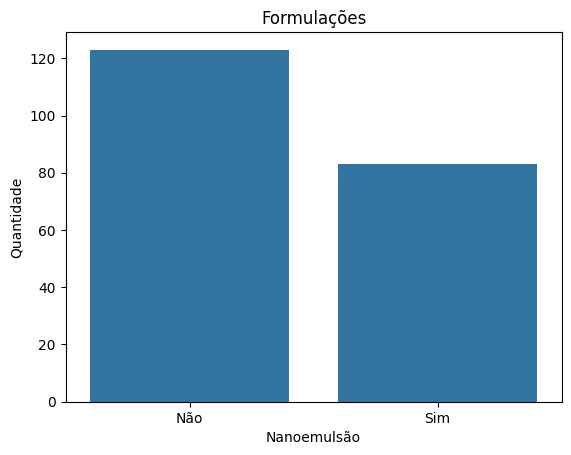

In [557]:
df['formou_nano'] = df.apply(lambda x:1 if (x['pdi'] <= PDI_CORTE_NANO) and (x['tamanho'] <= TAMANHO_CORTE_NANO) else 0, axis=1)
# df['formou_nano'] = df.apply(lambda x:1 if x['pdi'] <= PDI_CORTE_NANO else 0, axis=1)
df_temp = df['formou_nano'].value_counts().reset_index()

plt.Figure()
plt.title("Formulações")
sns.barplot(df_temp, x='formou_nano', y='count')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.xlabel("Nanoemulsão")
plt.ylabel("Quantidade")
plt.show()

# Normalização dos Dados

In [558]:
colunas = [col for col in df.columns if 'perc_' in col]
for col in colunas:
    if 'perc_lipidio' in col:
        continue
    if '1' in col:
        df['norm_' + col] = (df['perc_lipidio1'] / 100)  * df[col]
    else:            
        df['norm_' + col] = (df['perc_lipidio2']/ 100) * df[col]


In [559]:
colunas_normalizadas = [col for col in df.columns if 'norm_' in col]
colunas_normalizadas.extend(['tamanho', 'pdi','lipidio1', 'perc_lipidio1', 'lipidio2', 'perc_lipidio2', 'formou_nano'])

df[colunas_normalizadas].head()

,norm_perc_tensoativo,norm_perc_ac_palmitico1,norm_perc_ac_estearico1,norm_perc_ac_oleico1,norm_perc_ac_linoleico1,norm_perc_ac_vacenico1,norm_perc_ac_linolenico1,norm_perc_ac_caprilico1,norm_perc_ac_caprico1,norm_perc_ac_laurico1,...,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2,tamanho,pdi,lipidio1,perc_lipidio1,lipidio2,perc_lipidio2,formou_nano
0,12.500000,1.87500,0.87500,1.87500,0.87500,0.0,0.0,0.7500,0.500,11.2500,...,0.0,7.000,18.000,25.24,0.1054,Manteiga de murumuru,25.00,Óleo de Açaí,25.00,1
1,5.552775,3.75000,1.75000,3.75000,1.75000,0.0,0.0,1.5000,1.000,22.5000,...,0.0,4.662,11.988,72.10,0.1180,Manteiga de murumuru,50.00,Óleo de Açaí,16.65,1
2,16.675000,1.24875,0.58275,1.24875,0.58275,0.0,0.0,0.4995,0.333,7.4925,...,0.0,14.000,36.000,277.10,0.5644,Manteiga de murumuru,16.65,Óleo de Açaí,50.00,0
3,9.375000,2.81250,1.31250,2.81250,1.31250,0.0,0.0,1.1250,0.750,16.8750,...,0.0,10.500,27.000,83.22,0.1845,Manteiga de murumuru,37.50,Óleo de Açaí,37.50,1
4,6.250000,3.75000,1.75000,3.75000,1.75000,0.0,0.0,1.5000,1.000,22.5000,...,0.0,7.000,18.000,26.03,0.1290,Manteiga de murumuru,50.00,Óleo de Açaí,25.00,1


# Correlações

In [560]:
df_corr = df[colunas_normalizadas].corr(numeric_only=True)

### TOP 10 colunas com correlação NEGATIVA mais forte com o PDI
Correlação negativa implica que, quanto maior o valor da variável, MENOR será o PDI

In [561]:
correlacoes = df_corr

# Seleciona apenas a coluna 'pdi', exceto ele mesmo
correlacoes_pdi = correlacoes['pdi'].drop(['pdi', 'formou_nano', 'tamanho'])

# Ordena do mais negativo para o menos
correlacoes_negativas = correlacoes_pdi.sort_values()
top_10_negativas = correlacoes_negativas.head(10).index.to_list()
top_10_negativas.append('pdi')


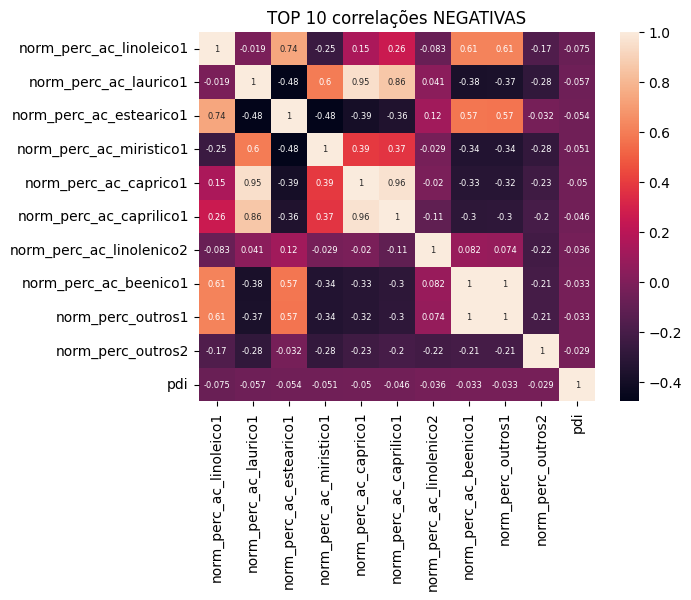

In [562]:
plt.figure()
plt.title("TOP 10 correlações NEGATIVAS")
sns.heatmap(df[top_10_negativas].corr(), annot=True, annot_kws={"size": 6})


plt.show()

### TOP 10 colunas com correlação POSITIVA mais forte com o PDI
Correlação positiva implica que, quanto maior o valor da variável, MAIOR será o PDI

In [563]:
correlacoes = df_corr

# Seleciona apenas a coluna 'pdi', exceto ele mesmo
correlacoes_pdi = correlacoes['pdi'].drop(['pdi', 'formou_nano', 'tamanho'])

# Ordena do mais negativo para o menos
correlacoes_positivas = correlacoes_pdi.sort_values(ascending=False)
top_10_positivas = correlacoes_positivas.head(10).index.to_list()
top_10_positivas.append('pdi')

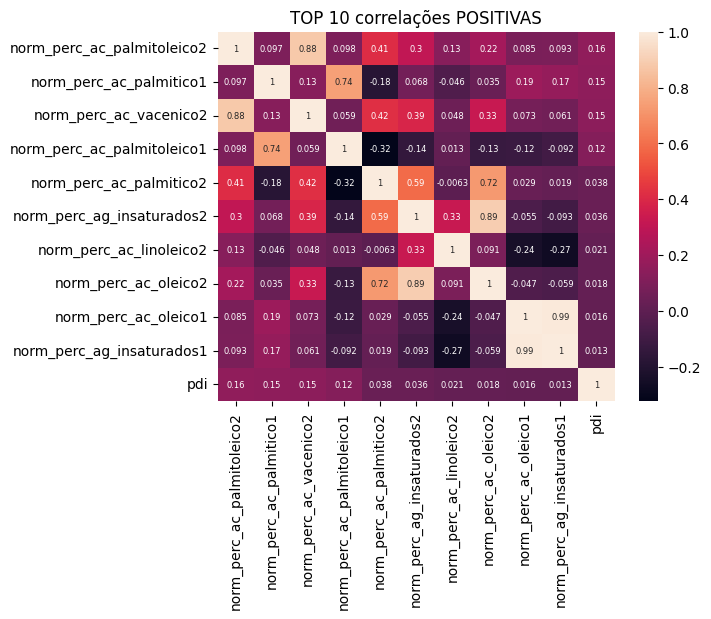

In [564]:
plt.figure()
plt.title("TOP 10 correlações POSITIVAS")
sns.heatmap(df[top_10_positivas].corr(), annot=True, annot_kws={"size": 6})

plt.show()

### Tamanho x PDI

In [565]:
print(len(df))
df.drop(df[df['pdi']> 600].index, inplace=True)
print(len(df))

206
205


pdi
1.000    19
0.700     4
0.500     4
0.200     3
0.327     3
0.430     3
0.152     3
0.244     2
0.268     2
0.040     2
Name: count, dtype: int64


,lipidio1,lipidio2,pdi


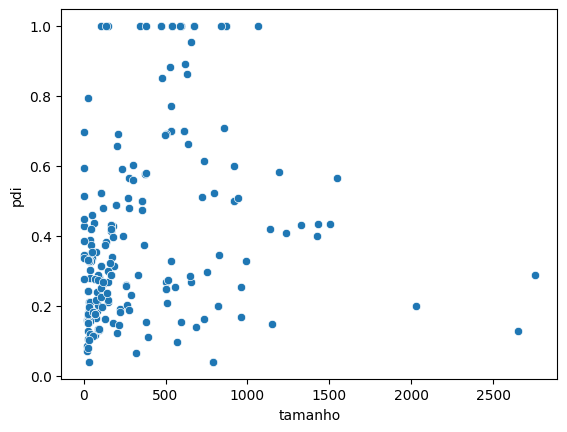

In [566]:
sns.scatterplot(df, x='tamanho', y='pdi')
print(df['pdi'].value_counts().sort_values(ascending=False).head(10))


df[df['pdi']> 1][['lipidio1', 'lipidio2', 'pdi']]

In [567]:
df[df['tamanho'] > 100000][['lipidio1', 'lipidio2', 'tamanho', 'pdi']]


,lipidio1,lipidio2,tamanho,pdi


In [568]:
print(df['tamanho'].value_counts().reset_index().sort_values(by='tamanho', ascending=False).head(10))

     tamanho  count
89   2754.00      1
137  2654.00      1
45   2029.00      1
133  1549.33      1
149  1501.33      1
141  1430.66      1
60   1424.00      1
64   1328.00      1
145  1236.66      1
67   1191.00      1


# Predição
Vamos testar a presição com as colunas abaixo:

In [569]:
df['lipidio2'] = df['lipidio2'].map(lambda x: '' if x == 0 else x)
df['lipidio2'].value_counts()

lipidio2
Óleo de Pracaxi        33
Óleo de Tucumã         32
Óleo de Açaí           31
Óleo de Buriti         22
Óleo de andiroba       22
                       21
Óleo de urucum         11
Óleo de Jambu          11
Óleo de Pequi          11
Manteiga de cupuaçu    11
Name: count, dtype: int64

In [570]:
from sklearn.preprocessing import LabelEncoder
df['lipidio1_id'] = LabelEncoder().fit_transform(df['lipidio1'])
df['lipidio2_id'] = LabelEncoder().fit_transform(df['lipidio2'])

colunas_normalizadas = [col for col in colunas_normalizadas if col not in ['lipidio1', 'lipidio2']]
print(colunas_normalizadas)

['norm_perc_tensoativo', 'norm_perc_ac_palmitico1', 'norm_perc_ac_estearico1', 'norm_perc_ac_oleico1', 'norm_perc_ac_linoleico1', 'norm_perc_ac_vacenico1', 'norm_perc_ac_linolenico1', 'norm_perc_ac_caprilico1', 'norm_perc_ac_caprico1', 'norm_perc_ac_laurico1', 'norm_perc_ac_miristico1', 'norm_perc_ac_palmitoleico1', 'norm_perc_ac_beenico1', 'norm_perc_ac_valerico1', 'norm_perc_ac_araquidico1', 'norm_perc_outros1', 'norm_perc_ag_saturados1', 'norm_perc_ag_insaturados1', 'norm_perc_ac_palmitico2', 'norm_perc_ac_estearico2', 'norm_perc_ac_oleico2', 'norm_perc_ac_linoleico2', 'norm_perc_ac_vacenico2', 'norm_perc_ac_linolenico2', 'norm_perc_ac_caprilico2', 'norm_perc_ac_caprico2', 'norm_perc_ac_laurico2', 'norm_perc_ac_miristico2', 'norm_perc_ac_palmitoleico2', 'norm_perc_ac_beenico2', 'norm_perc_ac_valerico2', 'norm_perc_ac_araquidico2', 'norm_perc_outros2', 'norm_perc_ag_saturados2', 'norm_perc_ag_insaturados2', 'tamanho', 'pdi', 'perc_lipidio1', 'perc_lipidio2', 'formou_nano']


In [571]:
df['formou_nano'].value_counts()

formou_nano
0    122
1     83
Name: count, dtype: int64

<Axes: xlabel='formou_nano', ylabel='count'>

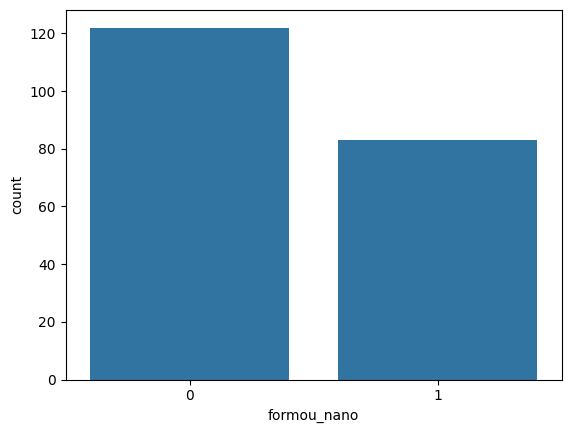

In [572]:
sns.countplot(data=df, x='formou_nano')

In [573]:
from sklearn.metrics import confusion_matrix


def show_confusion_matrix(modelo, y_test, y_pred):
    labels = ['Não', 'Sim']
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')
    plt.title(f'Matriz de Confusão: {modelo}')
    plt.show()

In [574]:
# Separar features e target
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


X = df[colunas_normalizadas].drop(columns=["formou_nano", "tamanho"])
y = df["formou_nano"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



🔍 Modelo: KNN
	f1 score: 0.6286	 acurácia: 0.6829	

🔍 Modelo: XGBoost
	f1 score: 0.0000	 acurácia: 0.6707	

🏆 Melhor modelo: KNN
Acurácia: 0.6829
F1-score: 0.6286


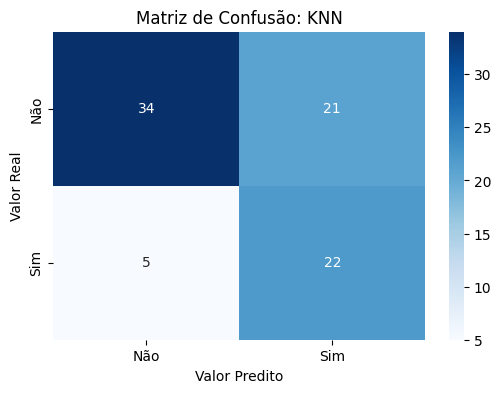

In [575]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# Dicionário de modelos
modelos = {
    # "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    # "Logistic Regression": LogisticRegression(),
    # "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=RANDOM_STATE, scale_pos_weight=0)
}

# Resultados
resultados = []

# Loop de avaliação
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append({
        'modelo': nome,
        'acuracia': acc,
        'f1_score': f1,
        'y_pred': y_pred,
        'modelo_treinado': modelo
    })

    print(f"\n🔍 Modelo: {nome}\n\tf1 score: {f1:.4f}\t acurácia: {acc:.4f}\t")

# Ordena os resultados pelo F1-score (ou outra métrica que quiser)
resultados_ordenados = sorted(resultados, key=lambda x: x['f1_score'], reverse=True)
melhor = resultados_ordenados[0]

# 🔝 Destaque do melhor modelo
print("\n" + "="*50)
print(f"🏆 Melhor modelo: {melhor['modelo']}")
print(f"Acurácia: {melhor['acuracia']:.4f}")
print(f"F1-score: {melhor['f1_score']:.4f}")
print("="*50)

show_confusion_matrix(melhor['modelo'], y_test, melhor['y_pred'])

### Colunas Usadas para Treinamento

In [576]:
X_train.columns

Index(['norm_perc_tensoativo', 'norm_perc_ac_palmitico1',
       'norm_perc_ac_estearico1', 'norm_perc_ac_oleico1',
       'norm_perc_ac_linoleico1', 'norm_perc_ac_vacenico1',
       'norm_perc_ac_linolenico1', 'norm_perc_ac_caprilico1',
       'norm_perc_ac_caprico1', 'norm_perc_ac_laurico1',
       'norm_perc_ac_miristico1', 'norm_perc_ac_palmitoleico1',
       'norm_perc_ac_beenico1', 'norm_perc_ac_valerico1',
       'norm_perc_ac_araquidico1', 'norm_perc_outros1',
       'norm_perc_ag_saturados1', 'norm_perc_ag_insaturados1',
       'norm_perc_ac_palmitico2', 'norm_perc_ac_estearico2',
       'norm_perc_ac_oleico2', 'norm_perc_ac_linoleico2',
       'norm_perc_ac_vacenico2', 'norm_perc_ac_linolenico2',
       'norm_perc_ac_caprilico2', 'norm_perc_ac_caprico2',
       'norm_perc_ac_laurico2', 'norm_perc_ac_miristico2',
       'norm_perc_ac_palmitoleico2', 'norm_perc_ac_beenico2',
       'norm_perc_ac_valerico2', 'norm_perc_ac_araquidico2',
       'norm_perc_outros2', 'norm_perc_ag_s

# Validação
Agora vamos testar a IA para resolver combinações diferentes de lipídios, inclusive, com lipídios que ela não havia conhecido no treinamento.

In [577]:
df = pd.read_csv('Formulacoes_Validacao.csv', sep=';')
df.columns = [x.lower() for x in df.columns]
df.drop(columns=['manteiga_1', 'manteiga_2', 'formulacao', 'oleo', 'translucida', 'pontodenuvem'], inplace=True)


df.fillna(0, inplace=True)
df.head()

df.head()

,perc_lipidio1,perc_lipidio2,perc_tensoativo,pdi,tamanho,l1,l2,lipidio1,pontofusao1,perc_ac_palmitico1,...,perc_ac_caprico2,perc_ac_laurico2,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2
0,"3,25","0,75","0,6",0.0,0.0,Manteiga de murumuru,Óleo de Palma,Manteiga de murumuru,325,"7,5",...,1,1,1,"0,5",0,0.0,"0,5",0.0,"47,8","52,2"
1,3,3,"0,4",0.0,0.0,Óleo de Bacaba,Manteiga de murumuru,Óleo de Bacaba,60,14,...,2,45,"30,5",3,0,0.0,0,0.0,90,10
2,2,"3,5","0,45",0.0,0.0,Óleo de Pequi,Manteiga de murumuru,Óleo de Pequi,210,"38,5",...,2,45,"30,5",3,0,0.0,0,0.0,90,10
3,3,2,"0,5",0.0,0.0,Óleo de Graviola,Manteiga de Ucuuba,Óleo de Graviola,150,"22,5",...,0,18,74,0,0,0.0,0,0.0,100,0
4,"2,5","2,5","0,5",0.0,0.0,Óleo de Maracujá,Manteiga de cupuaçu,Óleo de Maracujá,50,10,...,0,0,0,0,"1,5",0.0,0,3.0,55,45


In [578]:
df['tamanho'] = df['tamanho'].apply(lambda x: str(x).replace(',', '.'))
df['tamanho'] = pd.to_numeric(df['tamanho'])

df['pdi'] = df['pdi'].apply(lambda x: str(x).replace(',', '.'))
df['pdi'] = pd.to_numeric(df['pdi'])

for col in df.columns:
    if 'perc_' in col:
        df[col] = pd.to_numeric(df[col].apply(lambda x: str(x).replace(',', '.')))

In [579]:
colunas = [col for col in df.columns if 'perc_' in col]
for col in colunas:
    if 'perc_lipidio' in col:
        continue
    if '1' in col:
        df['norm_' + col] = (df['perc_lipidio1'] / 100)  * df[col]
    else:            
        df['norm_' + col] = (df['perc_lipidio2']/ 100) * df[col]

In [580]:


colunas_normalizadas = [col for col in df.columns if 'norm_' in col]
colunas_normalizadas.extend(['tamanho', 'pdi','lipidio1', 'perc_lipidio1', 'lipidio2', 'perc_lipidio2'])

df[colunas_normalizadas].head()

,norm_perc_tensoativo,norm_perc_ac_palmitico1,norm_perc_ac_estearico1,norm_perc_ac_oleico1,norm_perc_ac_linoleico1,norm_perc_ac_vacenico1,norm_perc_ac_linolenico1,norm_perc_ac_caprilico1,norm_perc_ac_caprico1,norm_perc_ac_laurico1,...,norm_perc_ac_araquidico2,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2,tamanho,pdi,lipidio1,perc_lipidio1,lipidio2,perc_lipidio2
0,0.00450,0.24375,0.11375,0.24375,0.11375,0.0,0.00000,0.0975,0.065,1.4625,...,0.00375,0.000,0.3585,0.3915,0.0,0.0,Manteiga de murumuru,3.25,Óleo de Palma,0.75
1,0.01200,0.42000,0.16500,1.72500,0.34500,0.0,0.00000,0.0000,0.000,0.0000,...,0.00000,0.000,2.7000,0.3000,0.0,0.0,Óleo de Bacaba,3.00,Manteiga de murumuru,3.00
2,0.01575,0.77000,0.00000,1.11000,0.03800,0.0,0.00600,0.0000,0.000,0.0000,...,0.00000,0.000,3.1500,0.3500,0.0,0.0,Óleo de Pequi,2.00,Manteiga de murumuru,3.50
3,0.01000,0.67500,0.15000,1.24500,0.82500,0.0,0.06000,0.0000,0.000,0.0000,...,0.00000,0.000,2.0000,0.0000,0.0,0.0,Óleo de Graviola,3.00,Manteiga de Ucuuba,2.00
4,0.01250,0.25000,0.05000,0.38750,1.83750,0.0,0.03125,0.0000,0.000,0.0000,...,0.00000,0.075,1.3750,1.1250,0.0,0.0,Óleo de Maracujá,2.50,Manteiga de cupuaçu,2.50


In [581]:
from sklearn.preprocessing import LabelEncoder
df['lipidio1_id'] = LabelEncoder().fit_transform(df['lipidio1'])
df['lipidio2_id'] = LabelEncoder().fit_transform(df['lipidio2'])

colunas_normalizadas = [col for col in colunas_normalizadas if col not in ['lipidio1', 'lipidio2']]
print(colunas_normalizadas)

['norm_perc_tensoativo', 'norm_perc_ac_palmitico1', 'norm_perc_ac_estearico1', 'norm_perc_ac_oleico1', 'norm_perc_ac_linoleico1', 'norm_perc_ac_vacenico1', 'norm_perc_ac_linolenico1', 'norm_perc_ac_caprilico1', 'norm_perc_ac_caprico1', 'norm_perc_ac_laurico1', 'norm_perc_ac_miristico1', 'norm_perc_ac_palmitoleico1', 'norm_perc_ac_beenico1', 'norm_perc_ac_valerico1', 'norm_perc_ac_araquidico1', 'norm_perc_outros1', 'norm_perc_ag_saturados1', 'norm_perc_ag_insaturados1', 'norm_perc_ac_palmitico2', 'norm_perc_ac_estearico2', 'norm_perc_ac_oleico2', 'norm_perc_ac_linoleico2', 'norm_perc_ac_vacenico2', 'norm_perc_ac_linolenico2', 'norm_perc_ac_caprilico2', 'norm_perc_ac_caprico2', 'norm_perc_ac_laurico2', 'norm_perc_ac_miristico2', 'norm_perc_ac_palmitoleico2', 'norm_perc_ac_beenico2', 'norm_perc_ac_valerico2', 'norm_perc_ac_araquidico2', 'norm_perc_outros2', 'norm_perc_ag_saturados2', 'norm_perc_ag_insaturados2', 'tamanho', 'pdi', 'perc_lipidio1', 'perc_lipidio2']


In [582]:
X_val = df[colunas_normalizadas].drop(columns=["tamanho"])
# Normalização
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val)


In [583]:
X_val.columns

Index(['norm_perc_tensoativo', 'norm_perc_ac_palmitico1',
       'norm_perc_ac_estearico1', 'norm_perc_ac_oleico1',
       'norm_perc_ac_linoleico1', 'norm_perc_ac_vacenico1',
       'norm_perc_ac_linolenico1', 'norm_perc_ac_caprilico1',
       'norm_perc_ac_caprico1', 'norm_perc_ac_laurico1',
       'norm_perc_ac_miristico1', 'norm_perc_ac_palmitoleico1',
       'norm_perc_ac_beenico1', 'norm_perc_ac_valerico1',
       'norm_perc_ac_araquidico1', 'norm_perc_outros1',
       'norm_perc_ag_saturados1', 'norm_perc_ag_insaturados1',
       'norm_perc_ac_palmitico2', 'norm_perc_ac_estearico2',
       'norm_perc_ac_oleico2', 'norm_perc_ac_linoleico2',
       'norm_perc_ac_vacenico2', 'norm_perc_ac_linolenico2',
       'norm_perc_ac_caprilico2', 'norm_perc_ac_caprico2',
       'norm_perc_ac_laurico2', 'norm_perc_ac_miristico2',
       'norm_perc_ac_palmitoleico2', 'norm_perc_ac_beenico2',
       'norm_perc_ac_valerico2', 'norm_perc_ac_araquidico2',
       'norm_perc_outros2', 'norm_perc_ag_s

In [584]:
modelo = melhor['modelo_treinado']
y_pred = modelo.predict(X_val_scaled)

In [585]:
df['formou_nano'] = y_pred

df

,perc_lipidio1,perc_lipidio2,perc_tensoativo,pdi,tamanho,l1,l2,lipidio1,pontofusao1,perc_ac_palmitico1,...,norm_perc_ac_palmitoleico2,norm_perc_ac_beenico2,norm_perc_ac_valerico2,norm_perc_ac_araquidico2,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2,lipidio1_id,lipidio2_id,formou_nano
0,3.25,0.75,0.600,0.0,0.0,Manteiga de murumuru,Óleo de Palma,Manteiga de murumuru,325,7.5,...,0.00375,0.00000,0.0,0.00375,0.0000,0.3585,0.3915,3,7,1
1,3.00,3.00,0.400,0.0,0.0,Óleo de Bacaba,Manteiga de murumuru,Óleo de Bacaba,60,14.0,...,0.09000,0.00000,0.0,0.00000,0.0000,2.7000,0.3000,5,3,1
2,2.00,3.50,0.450,0.0,0.0,Óleo de Pequi,Manteiga de murumuru,Óleo de Pequi,210,38.5,...,0.10500,0.00000,0.0,0.00000,0.0000,3.1500,0.3500,11,3,1
3,3.00,2.00,0.500,0.0,0.0,Óleo de Graviola,Manteiga de Ucuuba,Óleo de Graviola,150,22.5,...,0.00000,0.00000,0.0,0.00000,0.0000,2.0000,0.0000,8,1,0
4,2.50,2.50,0.500,0.0,0.0,Óleo de Maracujá,Manteiga de cupuaçu,Óleo de Maracujá,50,10.0,...,0.00000,0.03750,0.0,0.00000,0.0750,1.3750,1.1250,9,2,1
5,4.75,0.25,0.500,0.0,0.0,Óleo de Palma,Manteiga de cupuaçu,Óleo de Palma,365,40.7,...,0.00000,0.00375,0.0,0.00000,0.0075,0.1375,0.1125,10,2,0
6,4.50,0.50,0.500,0.0,0.0,Manteiga de cupuaçu,Manteiga de cupuaçu,Manteiga de cupuaçu,270,9.5,...,0.00000,0.00750,0.0,0.00000,0.0150,0.2750,0.2250,2,2,1
7,1.75,1.75,0.650,0.0,0.0,Manteiga de Bacuri,Óleo de Graviola,Manteiga de Bacuri,350,71.0,...,0.04375,0.00000,0.0,0.00000,0.0000,0.5250,1.2250,0,6,1
8,3.50,2.00,0.450,0.0,0.0,Manteiga de Bacuri,Manteiga de murumuru,Manteiga de Bacuri,350,71.0,...,0.06000,0.00000,0.0,0.00000,0.0000,1.8000,0.2000,0,3,0
9,2.50,2.50,0.500,0.0,0.0,Óleo de Castanha do Pará,Óleo de Palma,Óleo de Castanha do Pará,40,18.0,...,0.01250,0.00000,0.0,0.01250,0.0000,1.1950,1.3050,7,7,1


In [586]:
df[['lipidio1', 'lipidio2', 'formou_nano']]

,lipidio1,lipidio2,formou_nano
0,Manteiga de murumuru,Óleo de Palma,1
1,Óleo de Bacaba,Manteiga de murumuru,1
2,Óleo de Pequi,Manteiga de murumuru,1
3,Óleo de Graviola,Manteiga de Ucuuba,0
4,Óleo de Maracujá,Manteiga de cupuaçu,1
5,Óleo de Palma,Manteiga de cupuaçu,0
6,Manteiga de cupuaçu,Manteiga de cupuaçu,1
7,Manteiga de Bacuri,Óleo de Graviola,1
8,Manteiga de Bacuri,Manteiga de murumuru,0
9,Óleo de Castanha do Pará,Óleo de Palma,1
